In [1]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 430 kB/s 


In [2]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

In [3]:
fname_img = "ors_test.JPG"

In [4]:
! gdown --id 116HR3_qGSGHmkOWmpfOUiTIsIAOvbeZw

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=116HR3_qGSGHmkOWmpfOUiTIsIAOvbeZw
To: /content/ors_test.JPG
100% 7.00M/7.00M [00:00<00:00, 59.7MB/s]


In [5]:
os.path.isfile(fname_img)

True

In [6]:
img = rasterio.open(fname_img)

/usr/local/lib/python3.7/dist-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


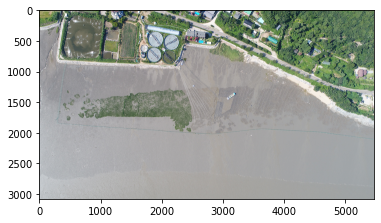

In [7]:
show(img)

In [8]:
type(img)

rasterio.io.DatasetReader

In [9]:
I = img.read()

In [10]:
I.shape

(3, 3078, 5472)

In [11]:
type(I)

numpy.ndarray

In [12]:
I = np.swapaxes(I, 0, 2)

In [13]:
I.shape

(5472, 3078, 3)

In [14]:
X = I.reshape((5472*3078),3)

In [15]:
X.shape

(16842816, 3)

In [16]:
I[0,1,:]

array([106, 121,  88], dtype=uint8)

In [17]:
X[1,:]

array([106, 121,  88], dtype=uint8)

In [18]:
I[1,0,:]

array([74, 93, 63], dtype=uint8)

In [22]:
X[3078,:]

array([74, 93, 63], dtype=uint8)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [27]:
print(pca.components_)

[[-0.61380612 -0.49992335 -0.61099811]
 [ 0.30703049  0.56185004 -0.76815156]
 [-0.72730621  0.65909118  0.19137528]]


In [28]:
x1 = pca.components_[:,0]
x2 = pca.components_[:,1]
np.dot(x1,x1)

0.9999999999999999

In [29]:
np.dot(x1,x2)

5.551115123125783e-17

In [30]:
print(pca.explained_variance_)

[4685.70165744  137.76220716   58.31891721]


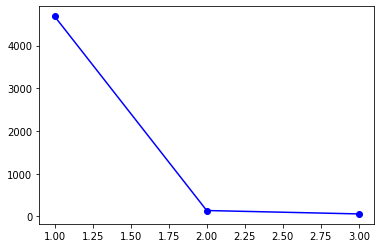

In [31]:
plt.plot(np.arange(3)+1, pca.explained_variance_, 'bo-')

In [32]:
X_pca = pca.transform(X)

In [33]:
X_pca.shape

(16842816, 3)

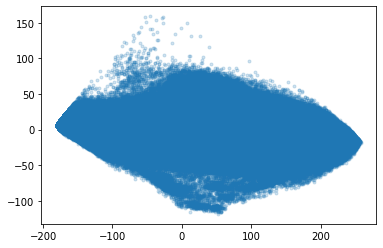

In [34]:
plt.scatter(X_pca[:,0],X_pca[:,1], marker='.', alpha=0.2)

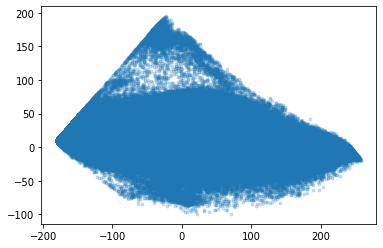

In [35]:
plt.scatter(X_pca[:,0], X_pca[:,2], marker='.', alpha=0.2)

In [36]:
I_pca = X_pca.reshape(5472, 3078, 3)

In [37]:
I_pca = np.swapaxes(I_pca, 0, 1)

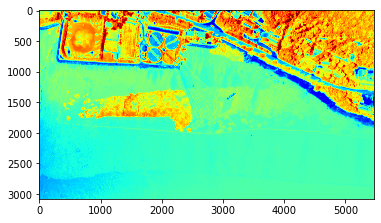

In [40]:
plt.imshow(I_pca[:,:,0], cmap='jet', vmin=-200, vmax=200)
plt.show()

In [47]:
#첫번째 주성분영상의 경우 식생이 주로 붉은색을 보이며, 갯벌과 도로는 파란색을 보임 → 갯벌/비갯벌 또는 식생/비식생

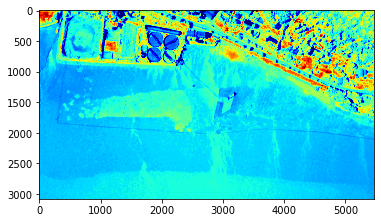

In [42]:
plt.imshow(I_pca[:,:,1], cmap='jet', vmin=-30, vmax=50)
plt.show()

In [48]:
#두번째 주성분영상에서는 식생중에서도 특히 식생고(hight)가 낮은(예:초지) 구간이 붉은색을 나타남

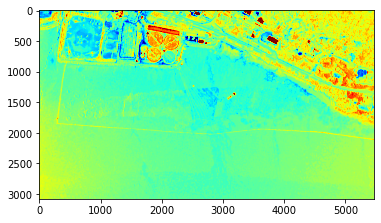

In [44]:
plt.imshow(I_pca[:,:,2], cmap='jet', vmin=-30, vmax=30)
plt.show()

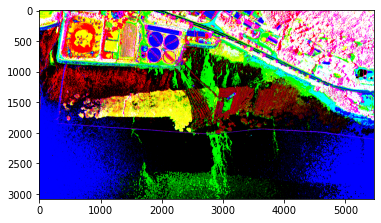

In [45]:
plt.imshow(I_pca)
plt.show()